In [59]:

import shap
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import sklearn

In [60]:
import sys
print(sys.getdefaultencoding())

utf-8


In [61]:
# import dataset
data = pd.read_csv('ICE_new_1.csv')
y = data['ICE']
X = data.drop('ICE', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
print(X)


    2theta-002   d002        Lc  Id/Ig     La  Vt(cm3g-1)  \
0       23.760  0.370  0.880000   2.24   2.04        0.79   
1       23.010  0.390  0.750000   2.24   2.29        0.92   
2       23.010  0.390  0.790000   2.24   1.93        1.06   
3       23.760  0.370  0.800000   2.24   2.29        0.72   
4       23.760  0.370  0.790000   2.24   1.82        0.62   
5       23.010  0.390  0.770000   2.24   1.92        1.15   
6       22.260  0.400  0.760000   2.24   2.37        0.51   
7       25.380  0.354  1.740000   2.15   8.93        0.51   
8       25.350  0.358  1.500000   2.24   8.58        0.51   
9       25.320  0.360  1.470000   2.57   7.47        0.51   
10      25.370  0.360  1.580000   2.38   8.08        0.51   
11      25.430  0.359  1.600000   1.99   9.68        0.51   
12      25.470  0.358  2.350000   1.67  11.50        0.51   
13      25.760  0.354  3.910000   1.45  13.24        0.51   
14      25.830  0.353  6.710000   0.94  20.50        0.51   
15      23.294  3.810  1

In [63]:
# 归一化处理
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [64]:
# 设置XGBoost参数
params = {
    'booster': 'gbtree',
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'eta': 0.05,
    'max_depth': 3,
    'subsample': 0.05,
    'colsample_bytree': 0.2
}

# 训练模型
model = xgb.train(params, dtrain, num_boost_round=100)

# 预测结果
y_pred = model.predict(dtest)

# 计算均方误差
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 149.30655675039353


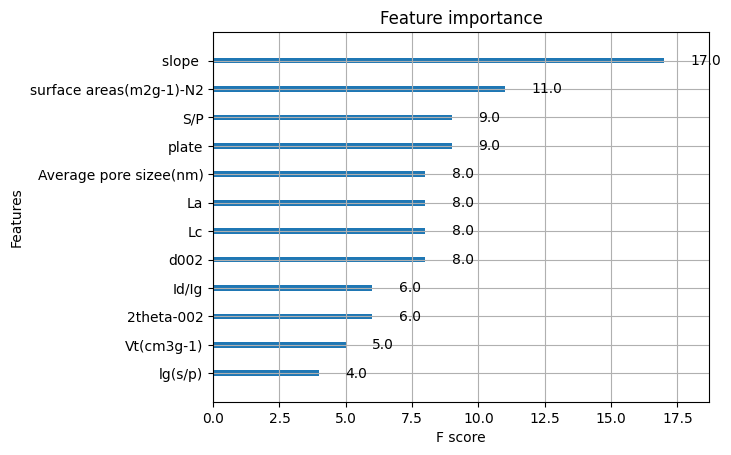

In [65]:
# 可视化特征重要性
xgb.plot_importance(model)
plt.show()

In [66]:
# Get SHAP interaction values
explainer = shap.TreeExplainer(model)
shap_interaction = explainer.shap_interaction_values(X)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 1029: invalid start byte